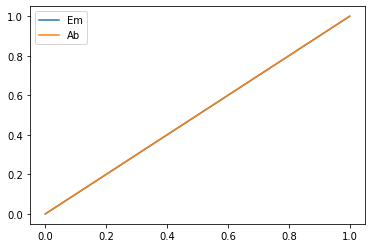

k:  1 N: 2
Internal average: 0.500 0.500
Simpson:  0.5 0.5
Romb:  0.5 0.5
Internal Romberg:  0.5000000002005797 0.5


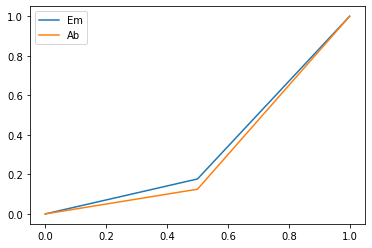

k:  2 N: 3
Internal average: 0.392 0.375
Simpson:  0.28451779689728285 0.25000000000905676
Romb:  0.28451779689728285 0.2500000000090567
Internal Romberg:  0.28451779689728285 0.2499999999728297


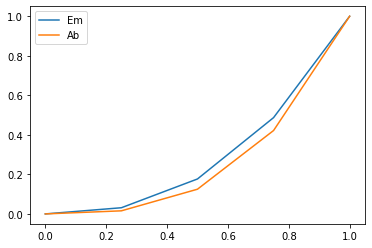

k:  3 N: 5
Internal average: 0.339 0.312
Simpson:  0.2855925457532043 0.24999999999999994
Romb:  0.2856641956769324 0.24999999999939623
Internal Romberg:  0.28566419573202495 0.2499999999728297


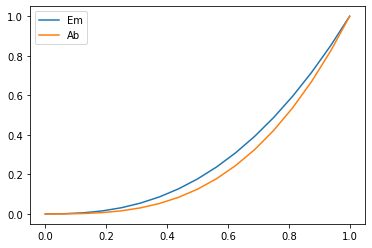

k:  5 N: 17
Internal average: 0.299 0.266
Simpson:  0.2857131773479795 0.25000000000014033
Romb:  0.2857139680432233 0.2499999999962329
Internal Romberg:  0.28571396803061466 0.2499999999728297


In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson, romb

def foo(k):
    # Calculate
    executable = "../build/averageangle_test"
    options = " -e_b 0.5 -e_e 1 -p 4 -nu 1e25 -electron_fraction 1 -M 2.9e22 -L 2.6e15 -e_th 0.3 -r 1 -k %i" %k
    res = os.popen(executable+options).readlines()
    #print(os.popen(executable+options).read())
    output = res[1:-2]
    avge, avga = res[-2].split()[1:]
    inte, inta = res[-1].split()[2:]
    # Load
    O = np.loadtxt(output).T
    angle = O[0]
    cos = O[1]
    em = O[2]
    ab = O[3]
    # Graph
    
    plt.plot(cos, em/em[-1], label='Em')
    plt.plot(cos, ab/ab[-1], label='Ab')
    plt.legend()
    plt.show()
    
    dx = cos[1]-cos[0]
    print('k: ', k,'N:', 1+2**(k-1))
    print('Internal average: %.3f %.3f' % (float(avge)/em[-1], float(avga)/ab[-1]))
    print('Simpson: ', simpson(em,cos)/em[-1], simpson(ab,cos)/ab[-1])
    print('Romb: ', romb(em,dx)/em[-1], romb(ab,dx)/ab[-1])
    print('Internal Romberg: ', float(inte)/em[-1], float(inta)/ab[-1])
foo(1)
foo(2)
foo(3)
foo(5)